In [101]:
%load_ext autoreload
%autoreload 2
from ff_environment import TargetReach
from agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
env = TargetReach(space_padding=2, discover=True)
env_info = env.reset()

In [103]:
# size of each action
action_size = env.action_size
print('Size of each action:', action_size)

# examine the state space 
state = env_info.state
state_size = len(state)
print('The agent observes a state with length: {}'.format(state_size))
print('The starting state looks like:', state)

Size of each action: 2
The agent observes a state with length: 6
The starting state looks like: [0.5 1.  0.  0.  0.  0. ]


In [104]:
# Instantiate the agent:
agent = Agent(state_size, action_size, random_seed=2)

In [105]:
# train the agent with ddpg
scores, trajectories, actions_tracker = agent.train_ddpg(env, n_episodes = 600, print_every=250)

C:\Users\decomite\Anaconda3\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 0 	Average Reward: -10.00
Episode 250 	Average Reward: -10.00
Episode 500 	Average Reward: -10.00
Episode 599 	Average Reward: -10.00

AttributeError: 'Trajectories' object has no attribute 'states'

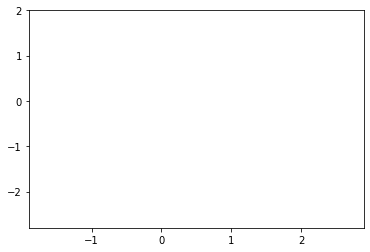

In [106]:
trajectories.plot(500, legend=False)

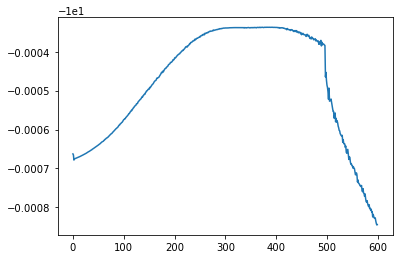

In [107]:
plt.plot(scores)

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Reward per episode'}, xlabel='Episode', ylabel='Total reward'>,
        <AxesSubplot:title={'center':'Last trajectory'}, xlabel='x-position', ylabel='y-position'>],
       dtype=object))

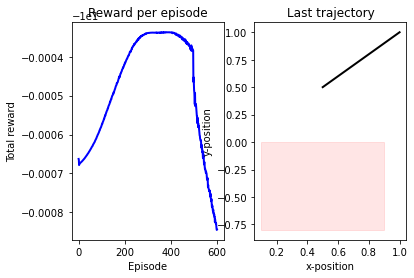

In [108]:
trajectories.plot_converged(legend=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:xlabel='Time', ylabel='x-position'>,
         <AxesSubplot:xlabel='Time', ylabel='y-position'>],
        [<AxesSubplot:xlabel='Time', ylabel='x-velocity'>,
         <AxesSubplot:ylabel='Time'>]], dtype=object))

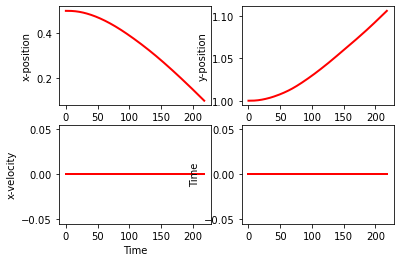

In [111]:
%load_ext autoreload
%autoreload 2
trajectories.plot_kinematics(25)

[] [] []
